In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Try manual ensemble

In [3]:
X=pd.read_pickle('data/X')
y=pd.read_pickle('data/y')

#Stratify to ensure that there are even proportions of each grade in the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 88, stratify =y,shuffle=True)   


In [4]:
X_smote=np.load('data/X_smote.npy', allow_pickle=True)
y_smote=np.load('data/y_smote.npy', allow_pickle=True)

In [5]:
#create validation set within smote training data
X_smote_train, X_smote_val, y_smote_train, y_smote_val = train_test_split(X_smote, y_smote, test_size=0.25, random_state=88)

In [6]:
#load models
rfr_smote= joblib.load('models/rfr_smote')
rfc_smote= joblib.load('models/rfc_smote')
xgr_smote= joblib.load('models/xgr_smote')
xgb_smote= joblib.load('models/xgb_smote')

In [51]:
pred_rfr_smote=rfr_smote.predict(X_smote_train)
pred_rfc_smote=rfc_smote.predict(X_smote_train)
pred_xgr_smote=xgr_smote.predict(X_smote_train)
pred_xgb_smote=xgb_smote.predict(X_smote_train)

In [53]:
print(pred_rfr_smote[0:4])
print(pred_rfc_smote[0:4])
print(pred_xgr_smote[0:4])
print(pred_xgb_smote[0:4])

[3.88610055 1.72481773 3.6475541  2.0279325 ]
['Grade 5' 'Grade 1' 'Grade 4' 'Grade 1']
[3.2160344 0.738638  2.6288917 0.9001562]
[4 0 4 1]


In [55]:
print(min(pred_rfr_smote))
print(max(pred_rfr_smote))
print(min(pred_rfc_smote))
print(max(pred_rfc_smote))
print(min(pred_xgr_smote))
print(max(pred_xgr_smote))
print(min(pred_xgb_smote))
print(max(pred_xgb_smote))


1.0
5.0
Grade 1
Grade 5
-0.5321888
4.280826
0
4


Standardize the prediction output into numbers 1 - 5

In [7]:
def standardize (pred_rfr_smote,pred_rfc_smote,pred_xgr_smote,pred_xgb_smote):
    
    pred_rfr_smote = [round(num) for num in pred_rfr_smote]
    
    mapping={'Grade 1':1, 'Grade 2':2 ,'Grade 3':3, 'Grade 4':4,'Grade 5':5} # force 0 and 6s into correct categories
    pred_rfc_smote = [mapping.get(number,number)for number in pred_rfc_smote]

    pred_xgr_smote=pred_xgr_smote+1
    pred_xgr_smote = [round(num) for num in pred_xgr_smote]
    mapping={0:1,6:5} # force 0 and 6s into correct categories
    pred_xgr_smote = [mapping.get(number,number)for number in pred_xgr_smote]

    pred_xgb_smote=pred_xgb_smote+1

    return pred_rfr_smote,pred_rfc_smote,pred_xgr_smote,pred_xgb_smote
    

Training

In [8]:
pred_rfr_smote=rfr_smote.predict(X_smote_train)
pred_rfc_smote=rfc_smote.predict(X_smote_train)
pred_xgr_smote=xgr_smote.predict(X_smote_train)
pred_xgb_smote=xgb_smote.predict(X_smote_train)

In [9]:
pred_rfr_smote,pred_rfc_smote,pred_xgr_smote,pred_xgb_smote = standardize (pred_rfr_smote,pred_rfc_smote,pred_xgr_smote,pred_xgb_smote)

In [10]:
mapping={'Grade 1':1, 'Grade 2':2 ,'Grade 3':3, 'Grade 4':4,'Grade 5':5} # force 0 and 6s into correct categories
y_smote_train = [mapping.get(number,number)for number in y_smote_train]

In [15]:
multiple_lists = [pred_rfr_smote,pred_rfc_smote,pred_xgr_smote,pred_xgb_smote]
arrays = [np.array(x) for x in multiple_lists]
average_pred=[np.mean(k)for k in zip(*arrays)] #calculate mode
average_pred = [round(num) for num in average_pred]

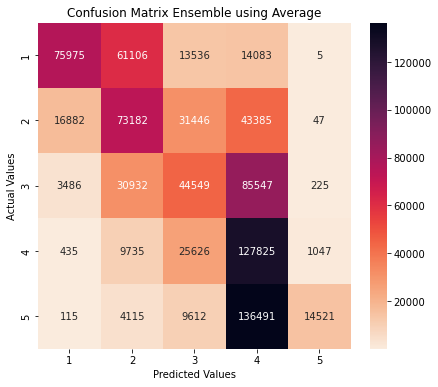

In [18]:
cm=confusion_matrix(y_smote_train,average_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])
                     
plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True,fmt='d',cmap='rocket_r')
plt.title('Confusion Matrix Ensemble using Average')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
f1_score(y_smote_train,average_pred,average='micro')

0.40787563660020293

Validation 

In [ ]:
pred_rfr_smote=rfr_smote.predict(X_smote_val)
pred_rfc_smote=rfc_smote.predict(X_smote_val)
pred_xgr_smote=xgr_smote.predict(X_smote_val)
pred_xgb_smote=xgb_smote.predict(X_smote_val)

In [109]:
print(len(pred_rfr_smote))
print(len(pred_rfc_smote))
print(len(pred_xgr_smote))
print(len(pred_xgb_smote))

274637
274637
274637
274637


In [113]:
pred_rfr_smote,pred_rfc_smote,pred_xgr_smote,pred_xgb_smote = standardize (pred_rfr_smote,pred_rfc_smote,pred_xgr_smote,pred_xgb_smote)

In [ ]:
mapping={'Grade 1':1, 'Grade 2':2 ,'Grade 3':3, 'Grade 4':4,'Grade 5':5} # force 0 and 6s into correct categories
y_smote_val = [mapping.get(number,number)for number in y_smote_val]

In [120]:
multiple_lists = [pred_rfr_smote,pred_rfc_smote,pred_xgr_smote,pred_xgb_smote]
arrays = [np.array(x) for x in multiple_lists]
average_pred=[np.mean(k) for k in zip(*arrays)]
average_pred = [round(num) for num in average_pred]

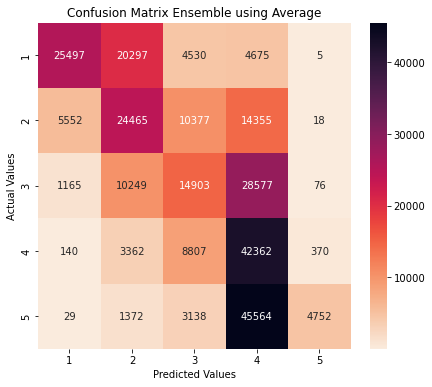

In [121]:
cm=confusion_matrix(y_smote_val,average_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])
                     
plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True,fmt='d',cmap='rocket_r')
plt.title('Confusion Matrix Ensemble using Average')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [123]:
f1_score(y_smote_val,average_pred,average='micro')

0.4077345732730841